popt_recta:
[ 2.95453130e+04 -5.84074709e+07] - m: 29545.313030901707 - y0: -58407470.93998882
pcov_recta:
[[ 2.95509855e+06 -5.92792767e+09]
 [-5.92792767e+09  1.18916593e+13]]
np.sqrt(np.diag(pcov_recta)):
[1.71904001e+03 3.44842852e+06]
popt_polinomio:
[ 3.45600964e-03 -8.06639299e+01  4.01308302e+05 -7.47818707e+08
  4.80420169e+11] - a: 0.003456009638045417 - b: -80.66392987214496 - c: 401308.30238982756 - d: -747818707.1748437 - e: 480420168563.37146
pcov_polinomio:
[[ 5.32372897e-05 -3.71041612e-01  9.47673460e+02 -1.04179016e+06
   4.09422773e+08]
 [-3.71358474e-01  2.91397275e+03 -8.57108446e+06  1.12001424e+10
  -5.48599345e+12]
 [ 9.49580447e+02 -8.57873490e+06  2.87028892e+10 -4.22532934e+13
   2.31316216e+16]
 [-1.04561574e+06  1.12206045e+10 -4.22840749e+13  6.79486741e+16
  -3.97960306e+19]
 [ 4.11980893e+08 -5.50138563e+12  2.31624928e+16 -3.98166692e+19
   2.44027566e+22]]
np.sqrt(np.diag(pcov_polinomio)):
[7.29638881e-03 5.39812259e+01 1.69419270e+05 2.60669665e+08
 1

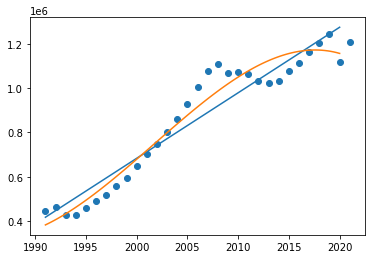

estimación del PIB en 2022 según: f_recta: 1333152 - f_polinomio: 1117826 - media: 1225489


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit

datos_pib = [[1991, 443715], [1992, 463263], [1993, 425936], [1994, 425089], [1995, 459337],
             [1996, 489203], [1997, 519268], [1998, 555993], [1999, 595723], [2000, 647851],
             [2001, 700993], [2002, 749552], [2003, 802226], [2004, 859437], [2005, 927357],
             [2006, 1003823], [2007, 1075539], [2008, 1109541], [2009, 1069323], [2010, 1072709],
             [2011, 1063763], [2012, 1031104], [2013, 1020677], [2014, 1032608], [2015, 1078092],
             [2016, 1114420], [2017, 1162492], [2018, 1203859], [2019, 1245513], [2020, 1117989],
             [2021, 1206842]]
df_pib = pd.DataFrame(datos_pib, columns=['Año', 'PIB'])

def f_recta(x, m, y0):
    return m * x + y0

popt_recta, pcov_recta = curve_fit(f_recta, df_pib['Año'], df_pib['PIB'])
m = popt_recta[0]
y0 =  popt_recta[1]
print(f'popt_recta:\n{popt_recta} - m: {m} - y0: {y0}')
print(f'pcov_recta:\n{pcov_recta}')
print(f'np.sqrt(np.diag(pcov_recta)):\n{np.sqrt(np.diag(pcov_recta))}')

def f_polinomio(x, a, b, c, d, e):
    return a * x ** 4 + b * x ** 3 + c * x ** 2 + d * x + e

popt_polinomio, pcov_polinomio = curve_fit(f_polinomio, df_pib['Año'], df_pib['PIB'])
a = popt_polinomio[0]
b = popt_polinomio[1]
c = popt_polinomio[2]
d = popt_polinomio[3]
e = popt_polinomio[4]
print(f'popt_polinomio:\n{popt_polinomio} - a: {a} - b: {b} - c: {c} - d: {d} - e: {e}')
print(f'pcov_polinomio:\n{pcov_polinomio}')
print(f'np.sqrt(np.diag(pcov_polinomio)):\n{np.sqrt(np.diag(pcov_polinomio))}')

fig, axes = plt.subplots()
axes.scatter(df_pib['Año'], df_pib['PIB'])
x_lista = np.linspace(1991, 2020, 100)
axes.plot(x_lista, f_recta(x_lista, m, y0))
axes.plot(x_lista, f_polinomio(x_lista, a, b, c, d, e))
plt.show()

pip2022_recta = f_recta(2022, m, y0)
pip2022_polinomio = f_polinomio(2022, a, b, c, d, e)
pip2022_media = (pip2022_recta + pip2022_polinomio) / 2
print(f'estimación del PIB en 2022 según: f_recta: {int(pip2022_recta)} - f_polinomio: {int(pip2022_polinomio)} - media: {int(pip2022_media)}')
